In [0]:
import pandas as pd
import numpy as np
import csv


In [103]:
old = pd.read_csv('flooding_311_Houston.csv')
old.tail()

,"weight|""lat""|""lon""|""Location""|Create Date|Closed Date|Due Date|CaseType|Case Number"
1|30.07892496|-95.20258109|2927 TWIN KNOLLS,HOUSTON TX 77339|2019-11-16 18:58:02.943|2019...
1|||Intersection 0 MAIN ST&9052 S SAM HOUSTON PKWY W|2019-06-25 15:42:57.837|2019-06-25 15:59:31.677|2019-06-29 15:42:57.000|Flooding| 101003545567,NaN
1|29.75989828|-95.36705705|611 WALKER,HOUSTON TX 77002|2019-08-29 09:31:21.413|2019...
1|29.69336654|-95.28411751|3216 AUBURN,HOUSTON TX 77017|2019-10-01 14:31:34.790|2019...
1|29.85940752|-95.37630474|Intersection 10700 CLARK RD&200 PARKER RD|2019-09-19 11:46:38.853|2019-09-20 11:04:26.897|2019-09-23 11:46:38.000|Flooding| 101003649913,NaN


In [0]:
with open('flooding_311_Houston.csv', newline='') as csvfile:
    weight = []
    xCor = []
    yCor = []
    location = []
    createDate = []
    closedDate = []
    dueDate = []
    caseType = []
    caseNumber = []
    spamreader = csv.reader(csvfile, delimiter='|', quotechar='|')
    it = 0
    it1 = 0
    allcol = []
    rowsError = []
    number = []
    for row in spamreader:
        it = it +1
        #print(it)
        #print(', '.join(row))
        #print(len(row))
        if(len(row) == 9):
            #print(row[1])
            it1 = it1 + 1
            #allcol.append(row[i])
            weight.append(row[0])
            xCor.append(row[1])
            yCor.append(row[2])
            location.append(row[3])
            createDate.append(row[4])
            closedDate.append(row[5])
            dueDate.append(row[6])
            caseType.append(row[7])
            caseNumber.append(row[8])
        else:
            number.append(it)
            rowsError.append(row )
            
            # else:
            #     #print('null')
            #     weight.append('null')
            #     xCor.append('null')
            #     yCor.append('null')
            #     location.append('null')
            #     createDate.append('null')
            #     closedDate.append('null')
            #     dueDate.append('null')
            #     caseType.append('null')
            #     caseNumber.append('null')

In [0]:
data =[weight, xCor,yCor,location,createDate, closedDate,dueDate, caseType,caseNumber]


In [106]:
newdf = pd.DataFrame({'Weight' : weight, 'Latitude' : xCor,'Longitude' : yCor, 'Location' :location,
                     'Create Date' : createDate, 'Closed Date' : closedDate, 'Due Date' : dueDate,
                     'Case Type' : caseType, 'Case Number' : caseNumber})
newdf = newdf.iloc[1:]

newdf.head()

,Weight,Latitude,Longitude,Location,Create Date,Closed Date,Due Date,Case Type,Case Number
1,1,30.08308216,-95.16932057,"3014 BROOK SHORE, HOUSTON TX 77345",2019-10-02 17:27:26.947,2019-10-09 12:32:35.443,2019-10-06 17:27:26.000,Flooding,101003671007
2,1,29.81316778,-95.45494586,"2811 HELBERG, HOUSTON TX 77092",2019-09-25 09:17:39.560,2019-09-26 10:44:25.517,2019-09-29 09:17:39.000,Flooding,101003659951
3,1,30.07366757,-95.15979873,"6218 RIVERCHASE, HOUSTON TX 77345",2019-09-19 19:36:21.587,2019-09-23 12:44:25.433,2019-09-23 19:36:21.000,Flooding,101003650823
4,1,29.8438371,-95.33688501,"3225 WIMBERLY, HOUSTON TX 77093",2019-09-19 11:35:11.263,2019-09-20 16:24:25.833,2019-09-23 11:35:11.000,Flooding,101003649882
5,1,30.06205131,-95.15821492,"5930 SPRING LODGE, HOUSTON TX 77345",2019-09-23 17:04:58.837,2019-09-24 11:24:26.920,2019-09-27 17:04:58.000,Flooding,101003656670


In [107]:
newdf1 = newdf.iloc[1:]
newdf1.head()
len(newdf1)

1476

In [0]:
xCor1 = []
yCor1 = []
xCor1 = newdf1['Latitude'].values
yCor1 = newdf1['Longitude'].values

In [0]:
xCor1 = np.asarray(xCor1)
yCor1 = np.asarray(yCor1)

In [110]:
newdf1['Latitude'].head()

2    29.81316778
3    30.07366757
4     29.8438371
5    30.06205131
6    29.95419955
Name: Latitude, dtype: object

In [111]:
!pip install geopandas # Work with geometry in Pandas dataframes
!pip install descartes # Helps geopandas plot polygons
!pip install pysal # Map classifiers for choropleth maps
!pip install -U --no-deps mapclassify git+git://github.com/geopandas/geopandas.git@master

  Using cached https://files.pythonhosted.org/packages/68/04/e9a456867aa2686186f7d1d1fd3c9598ac27a92d08063afa236a1f1fd7e2/pysal-2.2.0.tar.gz
  Using cached https://files.pythonhosted.org/packages/6f/00/bf40b380e9064222868c93ed51d81dd14b1266b16dd5a54e53aaed12caf2/libpysal-4.2.2.tar.gz
  Using cached https://files.pythonhosted.org/packages/16/f1/c2190bc3a7ef9c83ce0b060b927763352bfc0a55ccea8bb5fcd8975de347/esda-2.2.1.tar.gz
  Using cached https://files.pythonhosted.org/packages/6e/96/c9cac4d3a00dbe682a4031e3775cb7941f35ac9918efc481d4da7a89966d/giddy-2.3.0.tar.gz
  Using cached https://files.pythonhosted.org/packages/74/0f/9ed2d097f29160d0c873f33ffc0b9806c1083e3611acb2143eb66adcf580/inequality-1.0.0.tar.gz
  Using cached https://files.pythonhosted.org/packages/57/29/51bf19dc4452c1429f15335574642bfd5cb672ddbacf8a95c69967ff84b1/pointpats-2.1.0.tar.gz
  Using cached https://files.pythonhosted.org/packages/4d/69/288da08dde201dc250d6dadf6a9ad035e1a5d8b3bdc20b71c2874482d488/segregation-1.2.0-py3

In [0]:
import geopandas
import pandas as pd
import matplotlib.pyplot as plt
import descartes
# import geoplot as gplt
from shapely.geometry import Point, Polygon

In [113]:
!SHAPE_RESTORE_SHX=YES fio info Work10.shp
# https://koordinates.com/layer/12963-houston-texas-100-year-flood-plain-harris-county/ (source)
#floodMap = geopandas.read_file('houston-texas-100-year-flood-plain-harris-county.shp')
streetMap = geopandas.read_file('Work10.shp')
# Map = geopandas.read_file('tl_2018_48201_faces')

{"driver": "ESRI Shapefile", "schema": {"properties": {}, "geometry": "Polygon"}, "crs": "", "crs_wkt": "", "bounds": [-95.96073299999999, 29.497339, -94.908492, 30.170606], "name": "Work10", "count": 112035}


In [0]:
# Map.head()

In [0]:
long = newdf1['Longitude'].astype(str).astype(float)
lat = newdf1['Latitude'].astype(str).astype(float)

In [0]:
geometry = [Point(xy) for xy in zip(newdf1['Longitude'].astype(str).astype(float),newdf1['Latitude'].astype(str).astype(float))]

In [117]:
geometry[:3]

In [118]:
crs = {'init':'epsg:4326'}
geo_df = geopandas.GeoDataFrame(newdf1, crs=crs, geometry = geometry)
geo_df.head()

,Weight,Latitude,Longitude,Location,Create Date,Closed Date,Due Date,Case Type,Case Number,geometry
2,1,29.81316778,-95.45494586,"2811 HELBERG, HOUSTON TX 77092",2019-09-25 09:17:39.560,2019-09-26 10:44:25.517,2019-09-29 09:17:39.000,Flooding,101003659951,POINT (-95.45495 29.81317)
3,1,30.07366757,-95.15979873,"6218 RIVERCHASE, HOUSTON TX 77345",2019-09-19 19:36:21.587,2019-09-23 12:44:25.433,2019-09-23 19:36:21.000,Flooding,101003650823,POINT (-95.15980 30.07367)
4,1,29.8438371,-95.33688501,"3225 WIMBERLY, HOUSTON TX 77093",2019-09-19 11:35:11.263,2019-09-20 16:24:25.833,2019-09-23 11:35:11.000,Flooding,101003649882,POINT (-95.33689 29.84384)
5,1,30.06205131,-95.15821492,"5930 SPRING LODGE, HOUSTON TX 77345",2019-09-23 17:04:58.837,2019-09-24 11:24:26.920,2019-09-27 17:04:58.000,Flooding,101003656670,POINT (-95.15821 30.06205)
6,1,29.95419955,-95.17457671,"13050 SWEETGUM SHORES, HOUSTON TX 77044",2019-09-30 07:26:49.060,2019-10-10 12:39:25.570,2019-10-04 07:26:48.000,Flooding,101003666130,POINT (-95.17458 29.95420)


In [0]:
# fig,ax = plt.subplots(figsize = (15,15))
# Map.plot(ax = ax)

In [0]:
# fig,ax = plt.subplots(figsize = (15,15))
# streetMap.plot(ax = ax, color = 'grey')
# #floodMap.plot(ax = ax, color = 'lightskyblue')

In [0]:
# fig,ax = plt.subplots(figsize = (30,30))

# streetMap.plot(ax = ax , color ='grey' )
# #floodMap.plot(ax = ax, color = 'lightskyblue')
# geo_df[geo_df['Case Type'] == "Flooding" ].plot(ax = ax, markersize = 30, color = 'red', marker = 'o', label= 'Flood Report' )
# plt.legend(prop = {'size' : 30})

In [122]:
rowsError [:3] #data is missing here

[['1',
  'Intersection 0 MEMORIAL SERVICE RD&16 SHEPHERD DR',
  '2019-09-19 11:09:24.587',
  '2019-09-20 09:24:26.850',
  '2019-09-23 11:09:24.000',
  'Flooding',
  '        101003649801'],
 ['1',
  'Intersection 5800 W FUQUA ST & 6290 S SAM HOUSTON PKWY W',
  '2019-11-07 20:09:02.987',
  '2019-11-08 12:27:23.397',
  '2019-11-11 20:09:02.000',
  'Flooding',
  '        101003712883'],
 ['1',
  'Intersection 4700 BEECHNUT ST&8500 W LOOP FWY S',
  '2019-06-05 15:13:02.010',
  '2019-06-06 10:14:32.887',
  '2019-06-09 15:13:01.000',
  'Flooding',
  '        101003518778']]

In [123]:
number[:3] # the line number is excel with the missing data is here

[102, 131, 137]

In [0]:
from datetime import datetime, timedelta
import os

In [125]:
geo_df.head()
geo_df["date"] = pd.to_datetime(geo_df["Create Date"])
geo_df["period"] = 0
geo_df["period date"] = pd.to_datetime(geo_df["Create Date"])
geo_df["date"].head()

2   2019-09-25 09:17:39.560
3   2019-09-19 19:36:21.587
4   2019-09-19 11:35:11.263
5   2019-09-23 17:04:58.837
6   2019-09-30 07:26:49.060
Name: date, dtype: datetime64[ns]

In [126]:
#find times tropical storm imelda occurred and set in correct category
date1 = datetime(2019,9,17,0,0,0,0)
date3 = datetime(2019,9,22,0,0,0,0)
prd = 1
while date1<= date3:
    date2 = date1 + timedelta(hours = 4)
    for i in geo_df.index:
        if(geo_df["date"][i] >= date1 and geo_df["date"][i] <= date2):
            geo_df.loc[i,"period"] = prd
            geo_df.loc[i,"period date"] = date1 
    prd += 1
    date1 = date1 + timedelta(hours = 4)
geo_df.head().dtypes


Weight                 object
Latitude               object
Longitude              object
Location               object
Create Date            object
Closed Date            object
Due Date               object
Case Type              object
Case Number            object
geometry             geometry
date           datetime64[ns]
period                  int64
period date    datetime64[ns]
dtype: object

In [0]:
# machine learning imports

from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors

In [128]:
df = newdf[['Longitude', 'Latitude']].copy()
loc_df = df.to_numpy()
loc_df = loc_df.astype('float64') 
print(loc_df)
loc_df.dtype

[[-95.16932057  30.08308216]
 [-95.45494586  29.81316778]
 [-95.15979873  30.07366757]
 ...
 [-95.36705705  29.75989828]
 [-95.28411751  29.69336654]
 [-95.37630474  29.85940752]]


dtype('float64')

In [0]:
import sklearn
from sklearn import metrics
from sklearn.cluster import KMeans

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

import random

import warnings
warnings.filterwarnings("ignore")

In [130]:
loc_df.shape

(1477, 2)

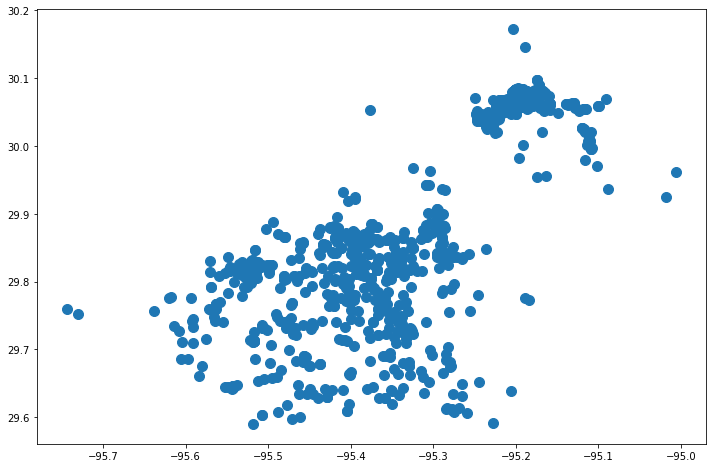

In [131]:
fig, ax = plt.subplots(figsize = (12,8))
plt.scatter(loc_df[:,0], loc_df[:,1], s = 100)
# s is the marker size in points

K means Algorithm

In [0]:
def kMeans(clusters,cycles,dataframe,test):
  loc_df = dataframe
  data_test = test
  kmeans_model = KMeans(n_clusters= clusters, max_iter=cycles).fit(loc_df)
  centroids = kmeans_model.cluster_centers_
  y_kmeans = kmeans_model.predict(loc_df)
  #colors = ['green' , 'blue', 'purple']
  # plt.figure(figsize=(12,8))
  # plt.scatter(loc_df[:,0], loc_df[:,1],c = y_kmeans, s = 100)
  # plt.scatter(centroids[:,0],centroids[:,1], c ='r', s = 250, marker= 's')

  # for i in range(len(centroids)):
  #   plt.annotate(i, (centroids[i][0] , centroids[i][1] ), fontsize = 30)

  # colors = ['green' , 'blue', 'purple']
  label_pred = kmeans_model.predict(data_test)
  plt.figure(figsize=(12,8))
  plt.scatter(loc_df[:,0], loc_df[:,1],c = y_kmeans, s = 100)
  plt.scatter(centroids[:,0],centroids[:,1], c ='r', s = 250, marker= 's')

  plt.scatter(data_test[:,0],data_test[:,1], c ='orange', s = 300, marker= '^')

  for i in range(len(label_pred)):
    plt.annotate(label_pred[i], (data_test[i][0], data_test[i][1]), fontsize = 30)

  # plt.scatter(centroids[:,0],centroids[:,1], c ='r', s = 250, marker= 's')

  for i in range(len(centroids)):
    plt.annotate(i, (centroids[i][0] , centroids[i][1] ), fontsize = 30)

  print('silhouette score : ' ,metrics.silhouette_score(loc_df, kmeans_model.labels_) )
  #uses distance metric, 
  #0.5298493569130379


silhouette score :  0.5341612754471009


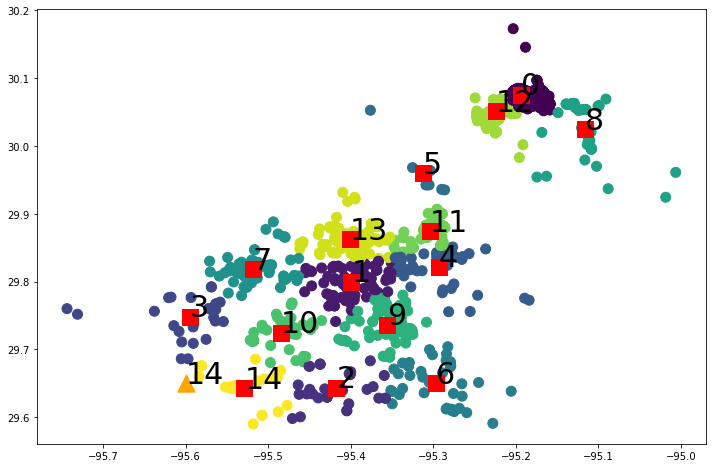

In [153]:
#def kMeans(clusters,cycles,dataframe,test):
data_test = np.array([[-95.6,29.65]])

kMeans(15,10000,loc_df,data_test)

In [84]:
# labels_1 = np.array([0 for i in range(150)])
# labels_2 = np.array([1 for i in range(150)])
# labels_3 = np.array([2 for i in range(150)])
# labels_4 = np.array([3 for i in range(150)])
# labels_5 = np.array([4 for i in range(150)])
# labels_6 = np.array([5 for i in range(150)])
# labels_7 = np.array([6 for i in range(150)])
# labels_8 = np.array([7 for i in range(150)])
# labels_9 = np.array([8 for i in range(150)])
# labels_10 = np.array([9 for i in range(150)])

# allDays = np.array([labels_1,labels_2,labels_3,labels_4,labels_5,labels_6,labels_7, labels_8, labels_9,labels_10])
# allLabels = allDays.flatten('F')
# allLabels.shape

(1500,)

In [85]:
# coor_df = pd.DataFrame({'data_x' : loc_df[:,0],'data_y' : loc_df[:,1], 'labels' : allLabels[0 :1477]})
# coor_df.sample(10)

,data_x,data_y,labels
1367,-95.428574,29.629613,7
1243,-95.193670,30.077280,3
62,-95.158933,30.052993,2
630,-95.199212,30.077074,0
158,-95.533618,29.814763,8
125,-95.361036,29.767206,5
931,-95.255424,29.755879,1
1414,-95.197762,30.065222,4
588,-95.201467,30.078077,8
514,-95.398814,29.847411,4


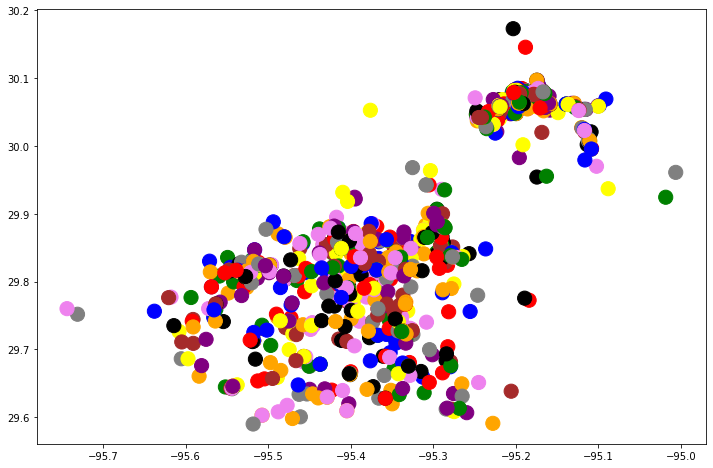

In [86]:
# colors = ['green','blue', 'purple','red','grey','black','orange','violet','yellow','brown']

# plt.figure(figsize=(12,8))

# plt.scatter(coor_df['data_x'],coor_df['data_y'],c = coor_df['labels'], s= 200, cmap=matplotlib.colors.ListedColormap(colors))

In [0]:
# kmeans_model = KMeans(n_clusters= 10, max_iter=10000).fit(loc_df)

In [88]:
# kmeans_model.labels_

array([9, 2, 9, ..., 0, 6, 3], dtype=int32)

In [89]:
# centroids = kmeans_model.cluster_centers_
# centroids # need not be points in original data
# #first is 0, second is 2 and third is 1

array([[-95.37163015,  29.76524182],
       [-95.11659553,  30.02522257],
       [-95.51705023,  29.81548602],
       [-95.40093644,  29.84808106],
       [-95.4538852 ,  29.6802681 ],
       [-95.22484399,  30.05166528],
       [-95.31213841,  29.65354499],
       [-95.55959106,  29.710918  ],
       [-95.29842254,  29.85725233],
       [-95.19365626,  30.07586012]])

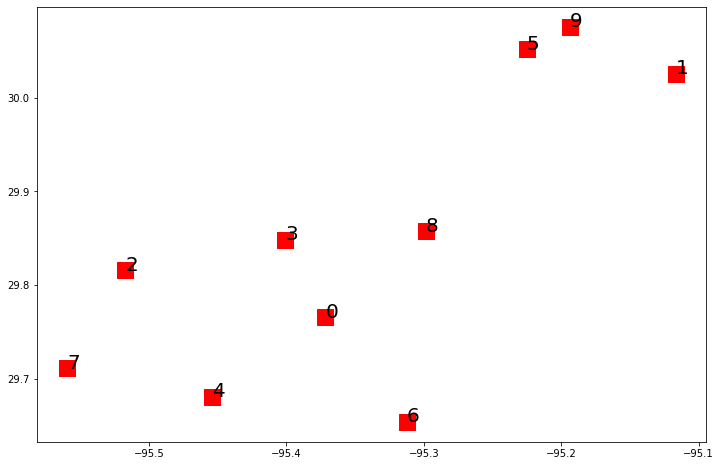

In [90]:
# fig, ax = plt.subplots(figsize = (12,8))
# plt.scatter(centroids[:,0], centroids[:,1], c = 'r', s = 250, marker='s')

# for i in range(len(centroids)):
#   plt.annotate(i, (centroids[i][0], centroids[i][1]), fontsize = 20)

In [91]:
# labels = allLabels[0:1477]
# print('Homogeneity score : ', metrics.homogeneity_score(labels, kmeans_model.labels_)) 
# #check if all points in group stay in group

# print('completeness score : ', metrics.completeness_score(labels, kmeans_model.labels_))
# #same class same cluster

# print('v_measure score : ', metrics.v_measure_score(labels,kmeans_model.labels_))
# #even weigtage of both above metrics

# print('adjusted rand score : ', metrics.adjusted_rand_score(labels, kmeans_model.labels_))
# #close to zero- data was randomly labelled and close to 1 - actual and predicted clusters are identical

# print('adjusted mutual info score : ', metrics.adjusted_mutual_info_score(labels, kmeans_model.labels_))
# #adjusted to account for chance and same as before

# print('silhouette score : ' ,metrics.silhouette_score(loc_df, kmeans_model.labels_) )
# #uses distance metric, 

Homogeneity score :  0.011723148327013724
completeness score :  0.013743238221228095
v_measure score :  0.012653072696885172
adjusted rand score :  -0.0002161817730833247
adjusted mutual info score :  -0.0005548156065032431
silhouette score :  0.5295643937368012


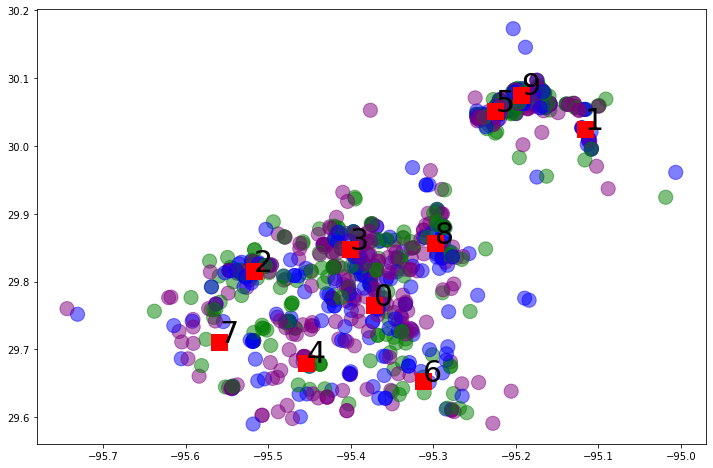

In [92]:
# colors = ['green' , 'blue', 'purple']
# plt.figure(figsize=(12,8))
# plt.scatter(coor_df['data_x'],coor_df['data_y'], c= coor_df['labels'], s = 200, cmap = matplotlib.colors.ListedColormap(colors), alpha=0.5)
# plt.scatter(centroids[:,0],centroids[:,1], c ='r', s = 250, marker= 's')

# for i in range(len(centroids)):
#   plt.annotate(i, (centroids[i][0] , centroids[i][1] ), fontsize = 30)

Prediction

In [0]:
# data_test = np.array([[442.,621.]])

In [0]:
# label_pred = kmeans_model.predict(data_test)

In [95]:
# label_pred

array([1], dtype=int32)

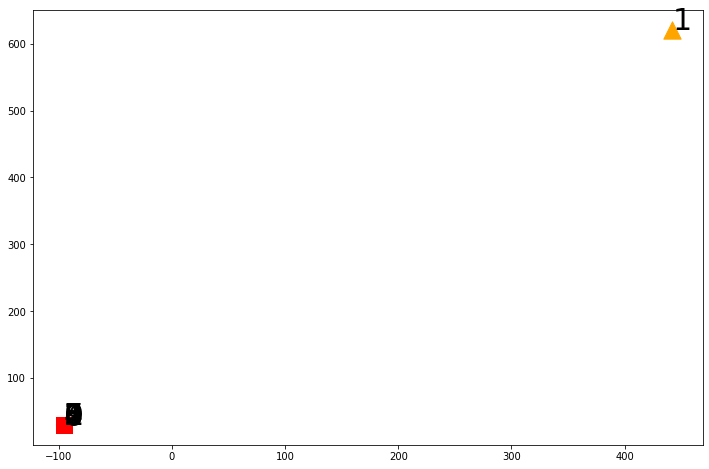

In [96]:
# colors = ['green' , 'blue', 'purple']
# plt.figure(figsize=(12,8))
# plt.scatter(coor_df['data_x'],coor_df['data_y'], c= coor_df['labels'], s = 200, cmap = matplotlib.colors.ListedColormap(colors), alpha=0.5)
# plt.scatter(data_test[:,0],data_test[:,1], c ='orange', s = 300, marker= '^')

# for i in range(len(label_pred)):
#   plt.annotate(label_pred[i], (data_test[i][0], data_test[i][1]), fontsize = 30)

# plt.scatter(centroids[:,0],centroids[:,1], c ='r', s = 250, marker= 's')

# for i in range(len(centroids)):
#   plt.annotate(i, (centroids[i][0] , centroids[i][1] ), fontsize = 30)

Estimated number of clusters: 29
Estimated number of noise points: 80


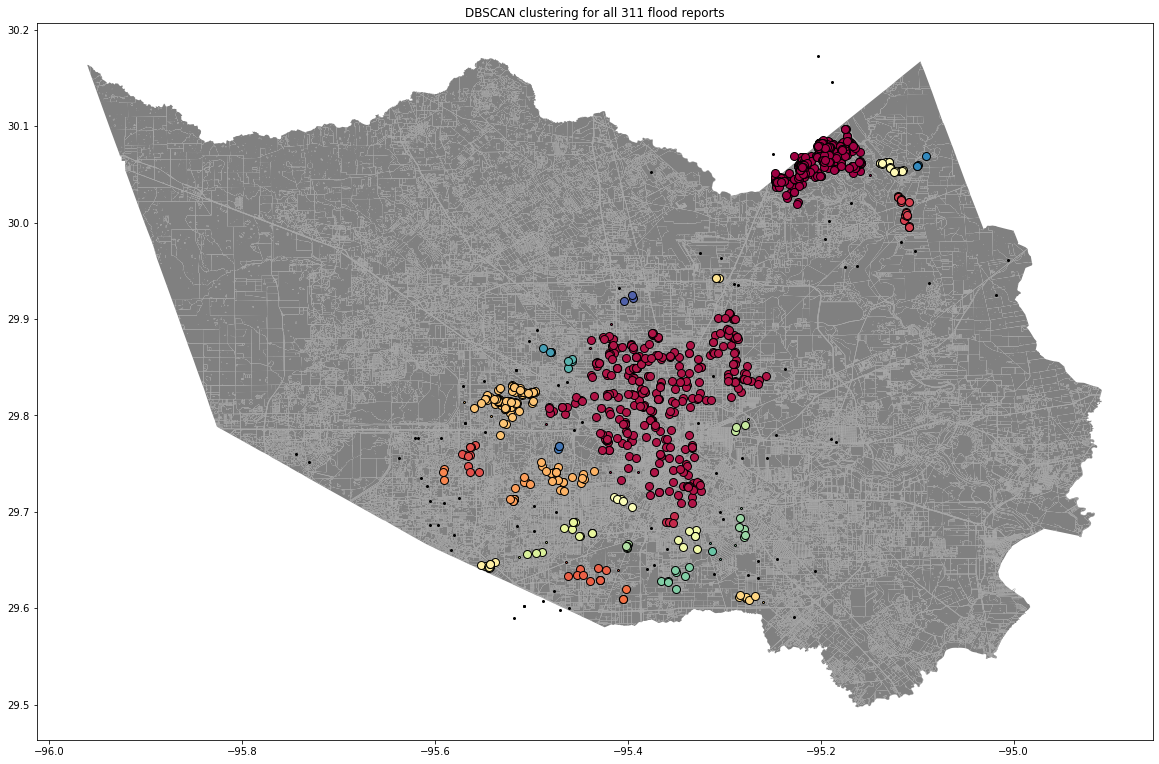

In [0]:
# # DBSCAN
# db = DBSCAN(eps=0.014409436819932573, min_samples=3).fit(loc_df)

# core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
# core_samples_mask[db.core_sample_indices_] = True
# labels = db.labels_

# n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
# n_noise_ = list(labels).count(-1)

# print('Estimated number of clusters: %d' % n_clusters_)
# print('Estimated number of noise points: %d' % n_noise_)

# #plot dbscan
# fig,ax = plt.subplots(figsize= (20,15))
# unique_labels = set(labels)
# colors = [plt.cm.Spectral(each)
#           for each in np.linspace(0, 1, len(unique_labels))]
# for k, col in zip(unique_labels, colors):
#     if k == -1:
#         # Black used for noise.
#         col = [0, 0, 0, 1]

#     class_member_mask = (labels == k)

#     #plot clusters
#     xy = loc_df[class_member_mask & core_samples_mask]
#     plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
#              markeredgecolor='k', markersize=8)
    
#     #plot outliers
#     xy = loc_df[class_member_mask & ~core_samples_mask]
#     plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
#              markeredgecolor='k', markersize=2)
    
# streetMap.plot(ax = ax , color ='grey' )
# plt.title('DBSCAN clustering for all 311 flood reports')
# plt.show()

In [0]:
# #!pip install hdbscan
# import hdbscan
# clusterer = hdbscan.HDBSCAN(min_cluster_size=15, gen_min_span_tree=True)
# clusterer.fit(loc_df)
# print(clusterer.probabilities_)
# # HDBSCAN(algorithm='best', alpha=1.0, approx_min_span_tree=True,
# #     gen_min_span_tree=True, leaf_size=40, memory=Memory(cachedir=None),
# #     metric='euclidean', min_cluster_size=5, min_samples=None, p=None)

[0.88312206 1.         0.         ... 1.         0.61630884 1.        ]


10
(0.5794754671020492, 0.423630398482409, 0.7214676407332772)


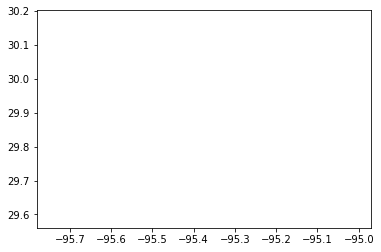

In [0]:
# import seaborn as sns
# plot_kwds = {'alpha' : 0.5, 's' : 80, 'linewidths':0}

# palette = sns.color_palette()
# print(len(palette))
# print(sns.desaturate(palette[clusterer.labels_[0]], clusterer.probabilities_[0]))
# cluster_colors = []
# for col, sat in zip(clusterer.labels_, clusterer.probabilities_):
#   if col >= 0:
#     #print(col)
#     sns.desaturate(palette[col], sat)
#   else:
#     (0.5, 0.5, 0.5)
# # cluster_colors = [sns.desaturate(palette[col], sat)
# #                   if col >= 0 else (0.5, 0.5, 0.5) for col, sat in
# #                   zip(clusterer.labels_, clusterer.probabilities_)]

# # plt.scatter(xy.T[0], xy.T[1], c=cluster_colors, **plot_kwds)

# plt.scatter(xy[:, 0], xy[:, 1], c=cluster_colors, **plot_kwds)

0.014409436819932573


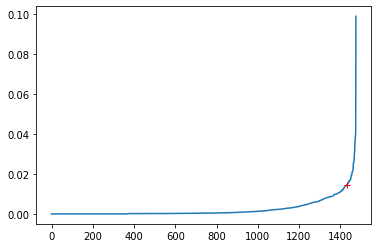

In [0]:
# # determining epsilon for DBSCAN
# neigh = NearestNeighbors(n_neighbors=3)
# nbrs = neigh.fit(loc_df)
# distances, indices = nbrs.kneighbors(loc_df)

# distances = np.sort(distances, axis=0)
# distances = distances[:,1]
# plt.plot(distances)
# plt.plot(1432,distances[1432],'r+')
# print(distances[1432])

In [0]:
# #create images (takes over 30 minutes to run currently)
# idx = 1
# date1 = datetime(2019,9,17,0,0,0,0)
# while idx <= 31:

#     West = 0
#     East = 0
#     North = 0
#     South = 0
#     Count = []
#     rect = []
#     date = []
#     # lol = False
#     for x in range(2950, 3020, 2):
#         for y in range(-9600, -9485, 2):
#             #bounds for each grid square
#             West = (float (y) / 100)
#             East = ((float(y) + 2) / 100)
#             North = ((float(x) + 2) / 100)
#             South = (float(x) / 100)
#             cnt = 0;

#             #check number of points in each grid
#             for i in geo_df["period" == idx].index:
#                 if(float(geo_df["Longitude"][i]) < East and float(geo_df["Longitude"][i]) > West):
#                     if(float(geo_df["Latitude"][i]) > South and float(geo_df["Latitude"][i]) < North):
#                         if(geo_df["period"][i] == idx):
#                             cnt += 1
#     #                     lol = True
#             Count.append(cnt)

#             rect.append( Polygon([(West,North), (East, North), (East, South), (West, South)]) )
#     counts = pd.DataFrame({'Count' : Count})
#     grid_df = geopandas.GeoDataFrame(crs=crs, geometry = rect)
    
#     #add point column on grid 
#     for index, row in grid_df.iterrows():
#         grid_df.loc[index, 'points'] = counts.loc[index, 'Count'].astype(str).astype(int)
#         grid_df.loc[index, 'number'] = index
#         grid_df['time'] = date1
#         grid_df['points'].convert_dtypes()
    
#     filepath = os.path.join('Charts', 'heatzone'+str(idx)+'jpg')
    
#     #create plot
#     fig = grid_df.plot(column='points',edgecolor='white',linewidth=.1,figsize=(15,15))
#     fig.set_title('311 Flood reports heat map from ' + date1.strftime("%c"))
    
#     chart= fig
#     plt.savefig(filepath)
#     date1 = date1 + timedelta(hours = 4)
#     idx += 1

In [0]:
# import imageio
# import glob
# from PIL import Image 

In [0]:
# # create gif
# images = []
# for f in glob.iglob("Charts/*"):
#       images.append(imageio.imread(f))
# imageio.mimsave('movie.gif', images)

In [0]:
# fig = grid_df.plot(column='points',edgecolor='white',linewidth=.1,figsize=(15,15))
# fig.set_title('311 Flood reports heat map')
# fig.show()
# plt.savefig("heat1.png", dpi=300)

In [0]:
# grid_df

In [0]:
# #map points to grid square
# for index, row in grid_df.iterrows():
#     grid_df.loc[index, 'points'] = counts.loc[index, 'Count'].astype(str).astype(int)
#     grid_df.loc[index, 'number'] = index

# grid_df['time'] = date1
# grid_df['points'].convert_dtypes()
# grid_df.head()


In [0]:
# # grid_df = pd.DataFrame({"Left" : West, "Right" : East, "Top" : North, "Bottom" : South, "numPoints" : Count})
# fig,ax = plt.subplots(figsize = (30,30))
# gplt.choropleth(grid_df, hue = 'points', edgecolor ='white',linewidth = .1,ax = ax,
#                 legend = True, legend_kwargs={'orientation': 'horizontal'})
# geo_df[geo_df['Case Type'] == "Flooding" ].plot(ax=ax,figsize = (30,30), markersize = 30, color = 'red', marker = 'o', label= 'Flood Report' )
# # gplt.pointplot(geo_df, s=4, color='red', ax=ax)

